In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set_style("whitegrid")

hate = pd.read_csv('/Users/ezzan/Downloads/hate_crimes.csv')
hate = hate[hate.state != 'District of Columbia']

# Crimes rates in United States post 2016 Election

Based on analysis, Washington D.C sticks out as a clear outlier in relevance to other states and has been omitted for the remainder of the project. This could be atttributed to the fact Washington D.C is completely city without an rural area to balance it out.

In [24]:
hate.head(50)

Northeast= [hate.loc[lambda hate: hate['state']== 'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York':]]
Midwest= [hate.loc[lambda hate: hate['state'] == 'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota':]]
Northwest= [hate.loc[lambda hate: hate['state'] == 'Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia','West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma','Texas':]
#Southwest= [hate.loc[lambda hate: hate['state'] == 'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Alaska', 'California','Oregon', 'Washington' :]]

Northeast = [hate[state['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']]]]
Midwest = [hate[state['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska']
Northwest= [hate[state['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia','West Virginia']]
Southwest= [hate[state['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California','Oregon', 'Washington']]]

SyntaxError: invalid syntax (<ipython-input-24-f0af47eeacd7>, line 8)

In [141]:
hate['Northeast'] = hate.state.isin(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'])
hate['Midwest'] = hate.state.isin(['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska','North Dakota', 'South Dakota'])
hate['Northwest']=hate.state.isin(['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia','West Virginia'])
hate['southwest'] =hate.state.isin(['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California','Oregon', 'Washington'])

In [142]:
display(hate[["state", "Northeast"]])
display(hate[["state", "southwest"]])
display(hate[["state", "Midwest"]])
display(hate[["state", "Northwest"]])


,state,Northeast
0,Alabama,False
1,Alaska,False
2,Arizona,False
3,Arkansas,False
4,California,False
5,Colorado,False
6,Connecticut,True
7,Delaware,False
9,Florida,False
10,Georgia,False


,state,southwest
0,Alabama,False
1,Alaska,True
2,Arizona,True
3,Arkansas,False
4,California,True
5,Colorado,True
6,Connecticut,False
7,Delaware,False
9,Florida,False
10,Georgia,False


,state,Midwest
0,Alabama,False
1,Alaska,False
2,Arizona,False
3,Arkansas,False
4,California,False
5,Colorado,False
6,Connecticut,False
7,Delaware,False
9,Florida,False
10,Georgia,False


,state,Northwest
0,Alabama,False
1,Alaska,False
2,Arizona,False
3,Arkansas,False
4,California,False
5,Colorado,False
6,Connecticut,False
7,Delaware,True
9,Florida,True
10,Georgia,True


In [42]:
for col in hate.columns:
    print(hate[col].describe())

count            50
unique           50
top       Minnesota
freq              1
Name: state, dtype: object
count       50.000000
mean     54962.540000
std       9109.318667
min      35521.000000
25%      48358.500000
50%      54613.000000
75%      60652.750000
max      76165.000000
Name: median_household_income, dtype: float64
count    50.00000
mean      0.04922
std       0.01051
min       0.02800
25%       0.04200
50%       0.05050
75%       0.05700
max       0.07300
Name: share_unemployed_seasonal, dtype: float64
count    50.000000
mean      0.745200
std       0.179855
min       0.310000
25%       0.630000
50%       0.785000
75%       0.885000
max       1.000000
Name: share_population_in_metro_areas, dtype: float64
count    50.000000
mean      0.869080
std       0.034418
min       0.799000
25%       0.839750
50%       0.875000
75%       0.898000
max       0.918000
Name: share_population_with_high_school_degree, dtype: float64
count    47.000000
mean      0.053404
std       0.030308
m

In [43]:
df_jittered = hate.loc[:, 'median_household_income':'hate_crimes_per_100k_splc']

jitter = pd.DataFrame(
    np.random.uniform(0, 1, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

df_jittered = df_jittered.add(jitter)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


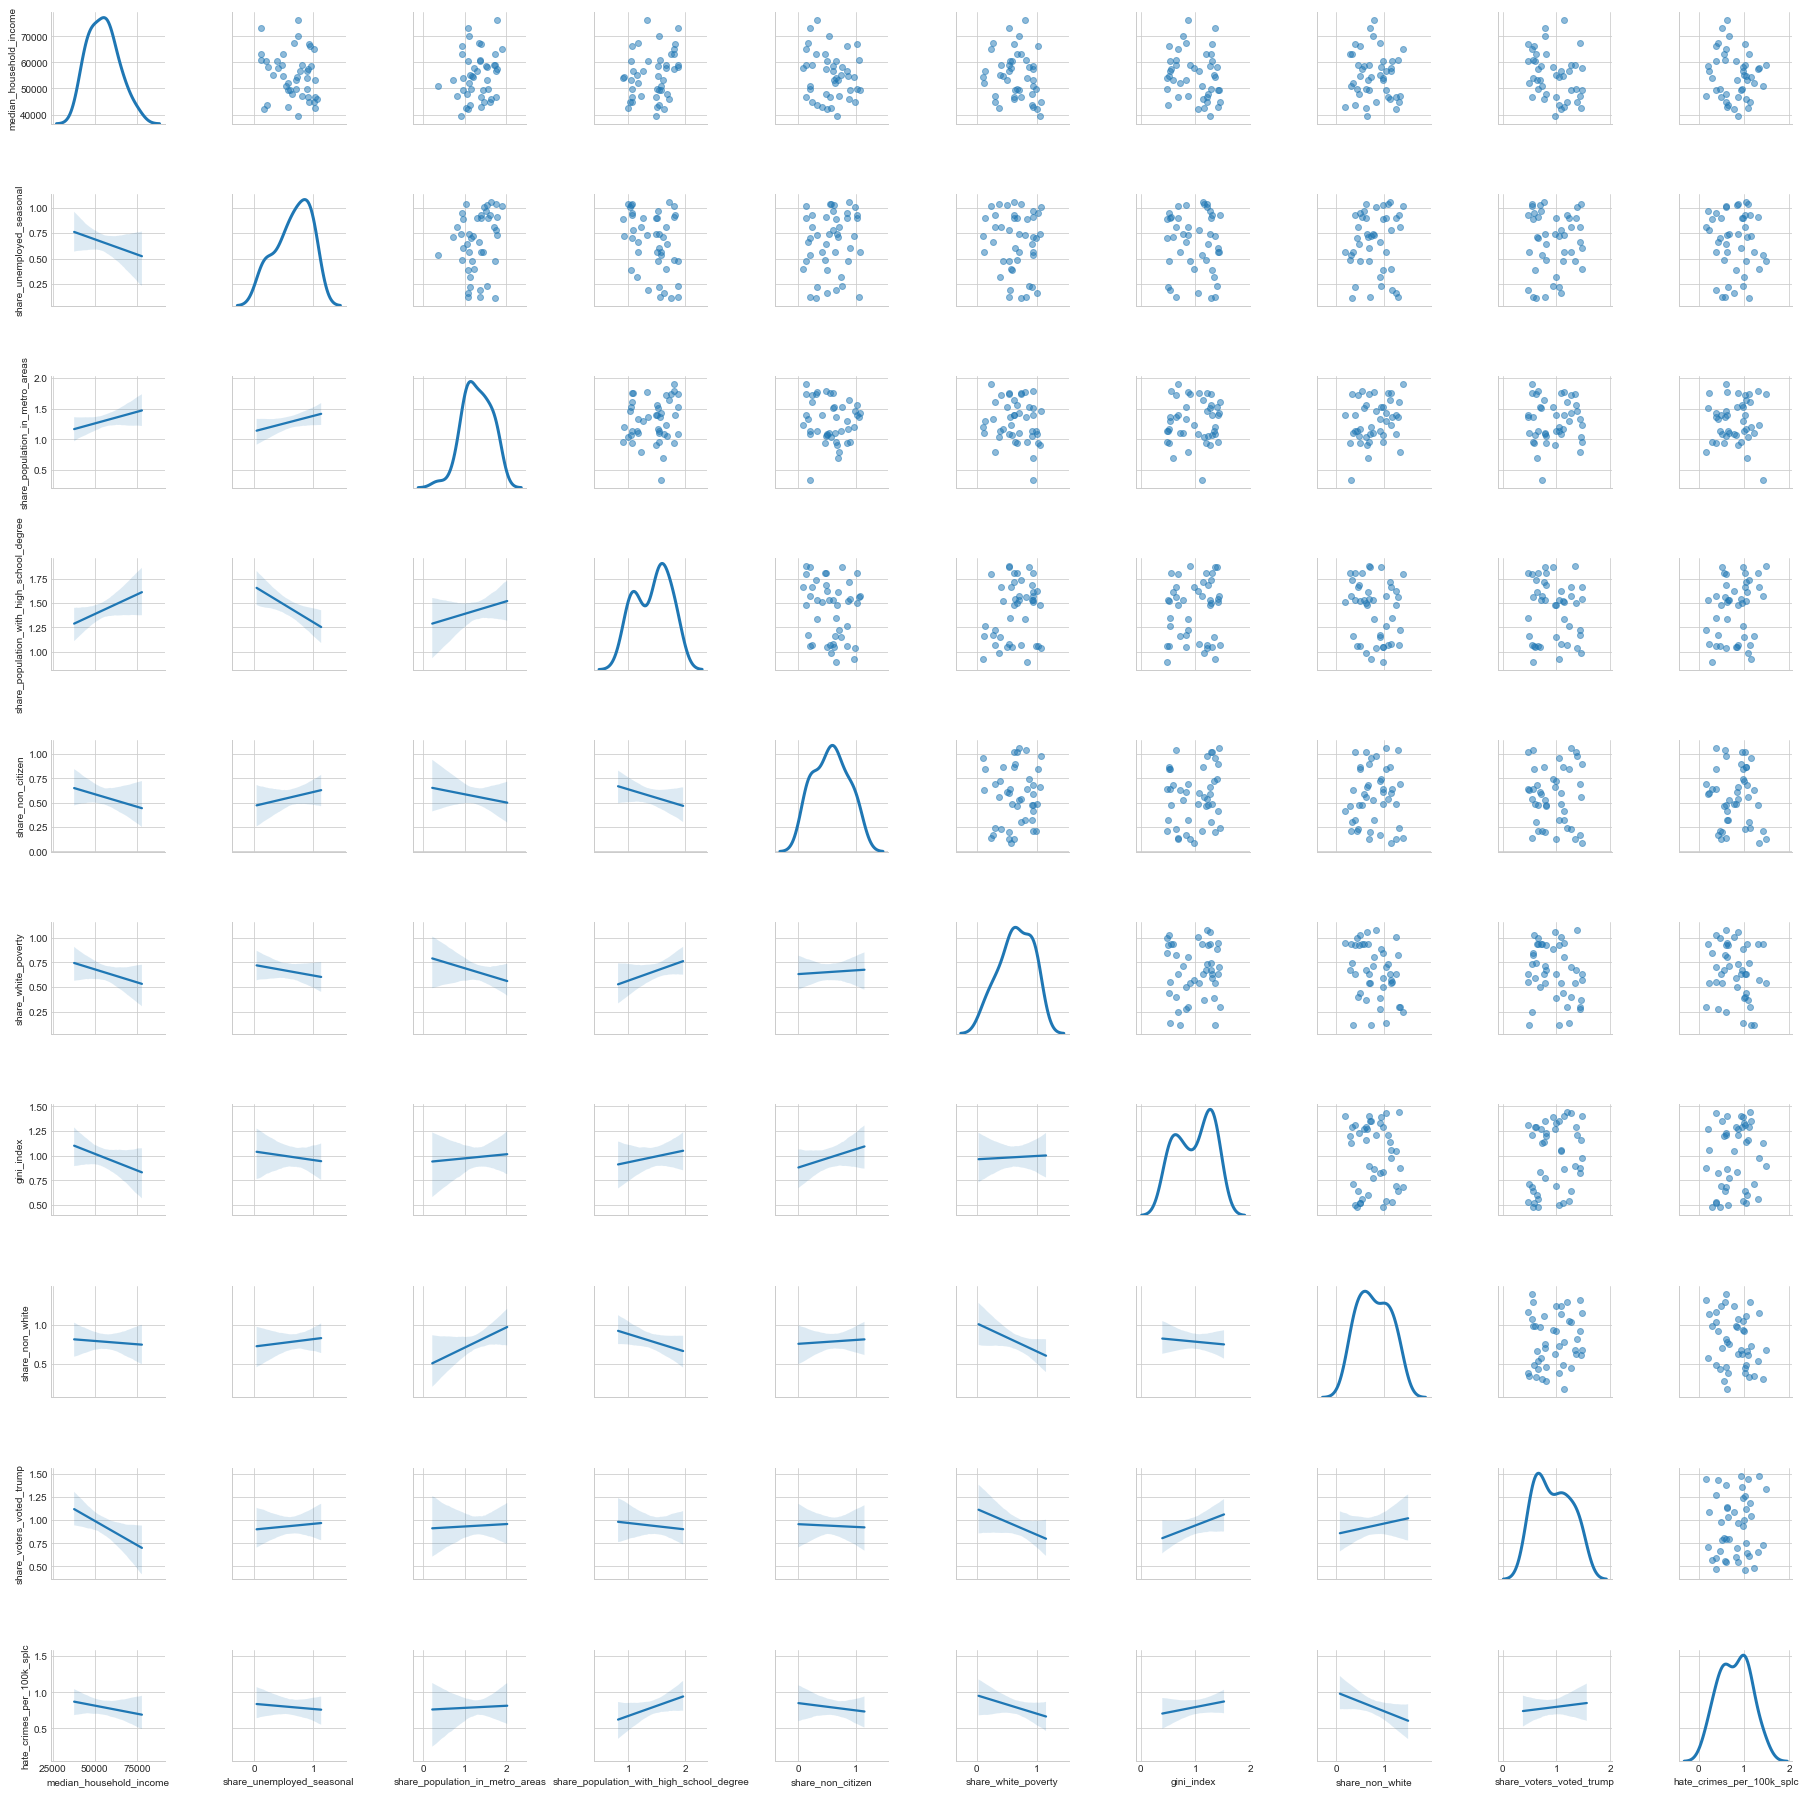

In [7]:


# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


In [ ]:
# diff. between pre and post election and whether recorded and not recorded

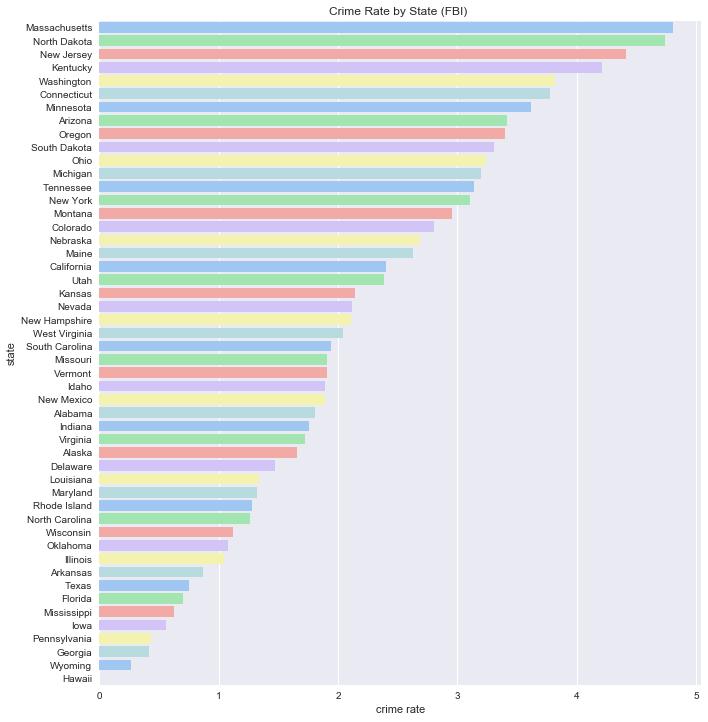

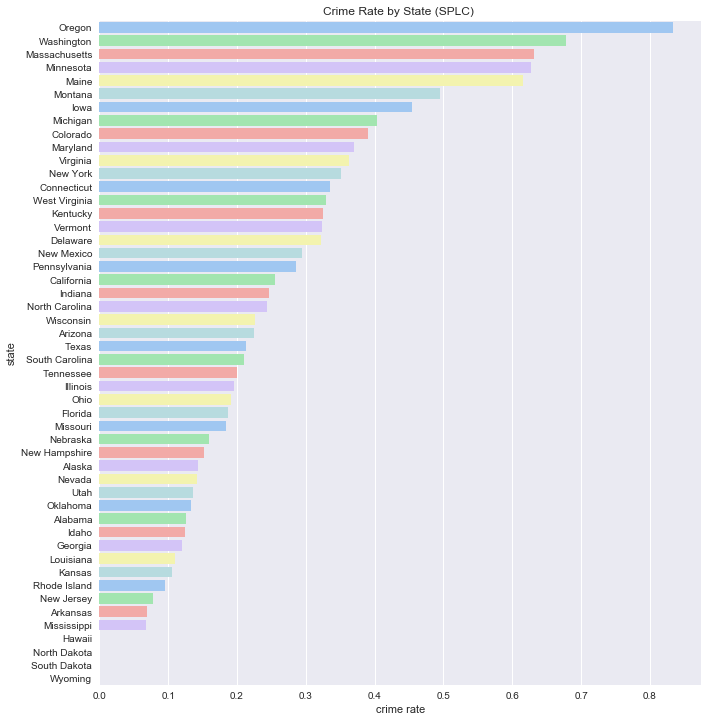

In [44]:

state_crime1 = hate.sort_values('avg_hatecrimes_per_100k_fbi',ascending=False)
sns.set(style="darkgrid")
g = sns.factorplot(x="avg_hatecrimes_per_100k_fbi", y="state", hue=None, data=state_crime1,
                   size=10, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("state")
g.set_xlabels("crime rate")
plt.title('Crime Rate by State (FBI) ')
plt.show()
sns.set(style="darkgrid")

state_crime2 = hate.sort_values('hate_crimes_per_100k_splc',ascending=False)
g = sns.factorplot(x="hate_crimes_per_100k_splc", y="state", hue=None, data=state_crime2,
                   size=10, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("state")
g.set_xlabels("crime rate")
plt.title('Crime Rate by State (SPLC) ')
plt.show()


                                          median_household_income  \
median_household_income                                  1.000000   
share_unemployed_seasonal                               -0.445023   
share_population_in_metro_areas                          0.256924   
share_population_with_high_school_degree                 0.665700   
share_non_citizen                                        0.263097   
share_white_poverty                                     -0.810619   
gini_index                                              -0.347002   
share_non_white                                          0.051640   
share_voters_voted_trump                                -0.592600   
hate_crimes_per_100k_splc                                0.286921   
avg_hatecrimes_per_100k_fbi                              0.242131   

                                          share_unemployed_seasonal  \
median_household_income                                   -0.445023   
share_unemployed_seasonal    

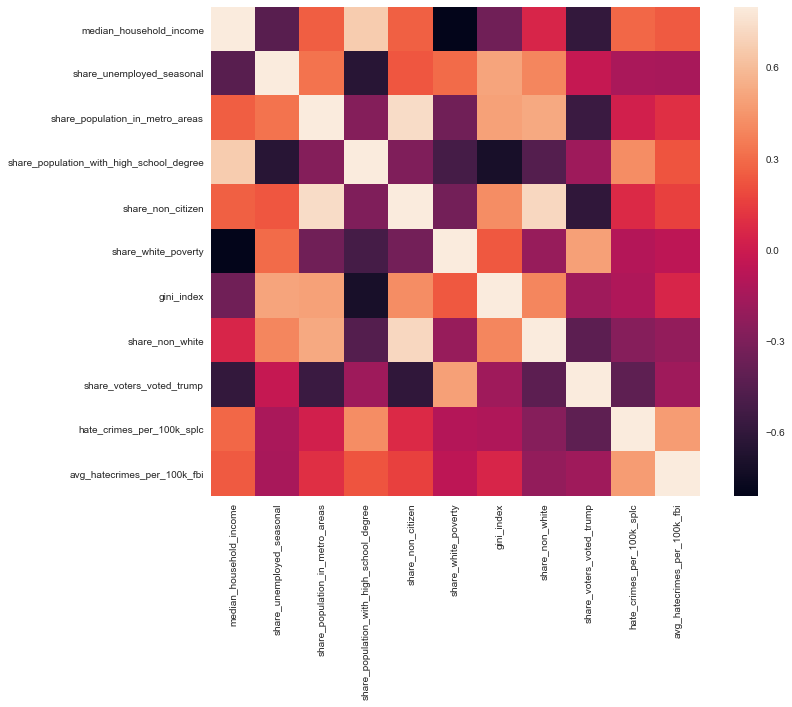

In [45]:

corrmat = hate.corr()
print(corrmat)
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

it appears from the above data that judging by absolute values, the highest correlation between Hate Crimes (per 100k) recorded by  the SPLC, are features such as (in descending order): "avg_hatecrimes_per_100k_fbi", "share_population_with_high_school_degree", "share_voters_voted_trump" and "median_household_income"

make clear which are positively correlated and which are negative...

In [33]:
income = [hate['median_household_income']]
crime_rate = [hate['hate_crimes_per_100k_splc']]

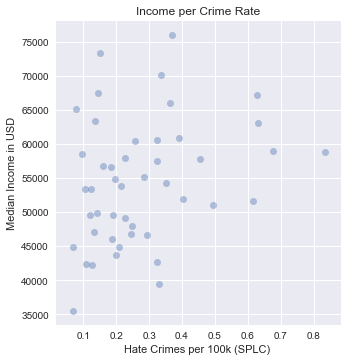

In [50]:
g = sns.lmplot(y='median_household_income', # Variable 1.
               x='hate_crimes_per_100k_splc',
               data=hate,
               fit_reg=False, 
               scatter_kws={'alpha':0.4})
g.set_ylabels("Median Income in USD")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Income per Crime Rate')
plt.show()

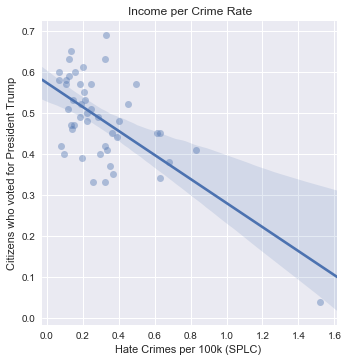

In [35]:

g = sns.lmplot(y='share_voters_voted_trump', # Variable 1.
               x='hate_crimes_per_100k_splc',
               data=hate, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Citizens who voted for President Trump")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Income per Crime Rate')
plt.show()

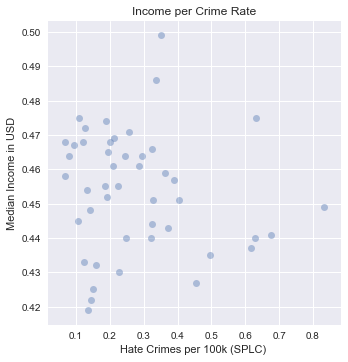

In [52]:

g = sns.lmplot(y='gini_index', # Variable 1.
               x='hate_crimes_per_100k_splc',
               data=hate, # Data.
               fit_reg=False, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Median Income in USD")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Income per Crime Rate')
plt.show()

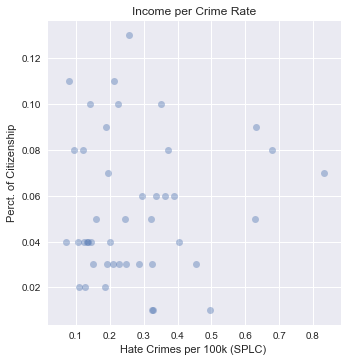

In [58]:

g = sns.lmplot(y='share_non_citizen', # Variable 1.
               x='hate_crimes_per_100k_splc',
               data=hate, # Data.
               fit_reg=False, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Perct. of Citizenship")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Income per Crime Rate')
plt.show()


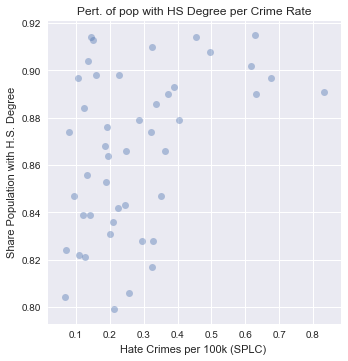

In [57]:


g = sns.lmplot(y='share_population_with_high_school_degree', # Variable 1.
               x='hate_crimes_per_100k_splc',
               data=hate,
               fit_reg=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Share Population with H.S. Degree")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Pert. of pop with HS Degree per Crime Rate')
plt.show()



In [39]:
crime1 = hate[["hate_crimes_per_100k_splc", "share_population_with_high_school_degree", "share_non_citizen","gini_index"]]

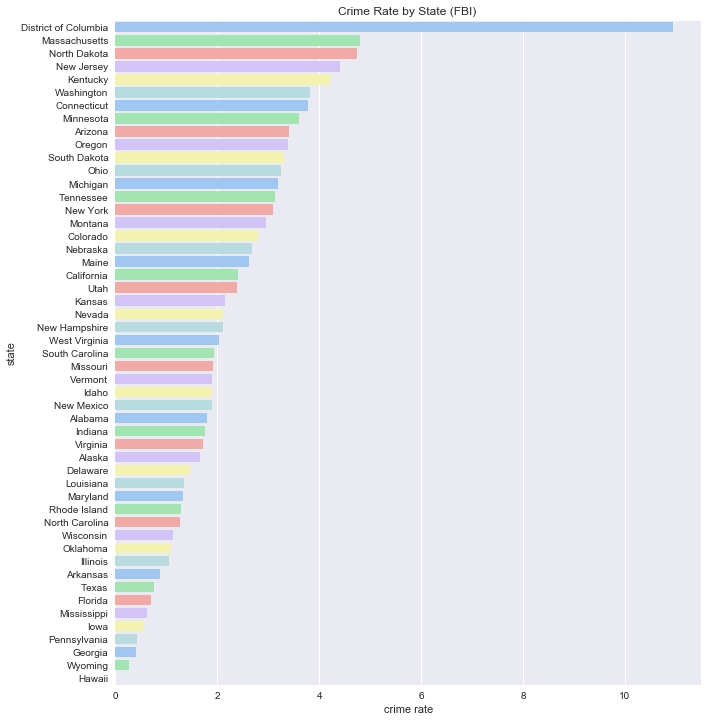

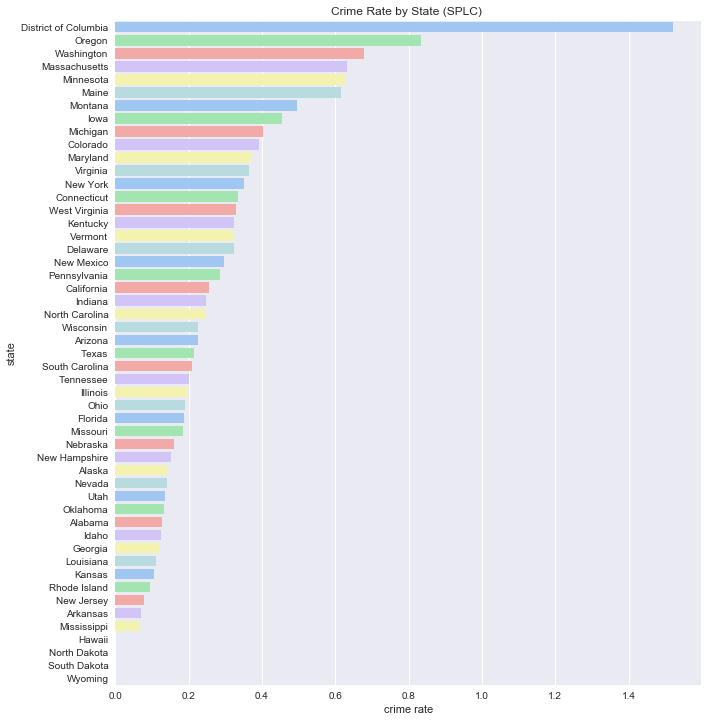

In [40]:

state_crime1 = hate.sort_values('avg_hatecrimes_per_100k_fbi',ascending=False)
sns.set(style="darkgrid")
g = sns.factorplot(x="avg_hatecrimes_per_100k_fbi", y="state", hue=None, data=state_crime1,
                   size=10, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("state")
g.set_xlabels("crime rate")
plt.title('Crime Rate by State (FBI) ')
plt.show()
sns.set(style="darkgrid")

state_crime2 = hate.sort_values('hate_crimes_per_100k_splc',ascending=False)
g = sns.factorplot(x="hate_crimes_per_100k_splc", y="state", hue=None, data=state_crime2,
                   size=10, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("state")
g.set_xlabels("crime rate")
plt.title('Crime Rate by State (SPLC) ')
plt.show()





In [222]:
hate['poverty'] =hate['share_white_poverty']+hate['gini_index']
hate.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,...,Southeast,Midwest,Northwest,southwest,Adult_65plus,above_avg.,below_avg.,absentee,citizen,poverty
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,...,False,False,False,False,0,0,1,1,1,0.592
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,...,False,False,False,True,0,0,1,1,1,0.482
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,...,False,False,False,True,1,1,0,2,2,0.545
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,...,False,False,False,False,0,0,1,1,1,0.578
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,...,False,False,False,True,1,1,0,2,2,0.561


In [223]:
hate.share_non_citizen.mean()
hate['above_avg.'] = np.where(hate['share_non_citizen']>=.05340, 1, 0)
hate['below_avg.'] = np.where(hate['share_non_citizen']<=.05340, 1, 0)

print(hate['share_non_citizen'].groupby(hate['above_avg.']).describe())
print(hate['share_non_citizen'].groupby(hate['below_avg.']).describe())

            count      mean       std   min     25%   50%   75%   max
above_avg.                                                           
0            28.0  0.032143  0.011974  0.01  0.0275  0.03  0.04  0.05
1            19.0  0.084737  0.019824  0.06  0.0700  0.08  0.10  0.13
            count      mean       std   min     25%   50%   75%   max
below_avg.                                                           
0            19.0  0.084737  0.019824  0.06  0.0700  0.08  0.10  0.13
1            28.0  0.032143  0.011974  0.01  0.0275  0.03  0.04  0.05


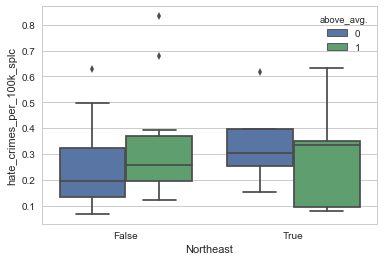

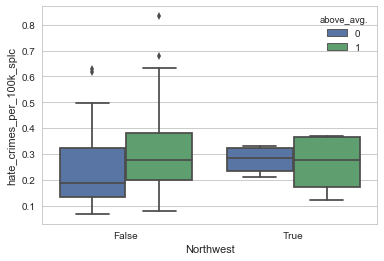

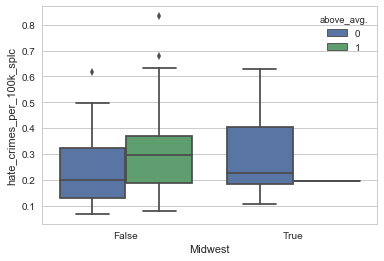

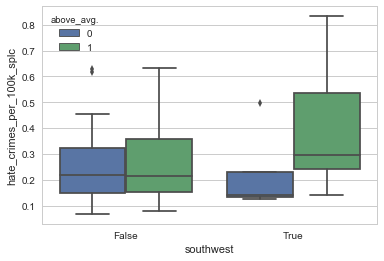

In [224]:
sns.boxplot(y="hate_crimes_per_100k_splc", x="Northeast", hue="above_avg.", data=hate)
plt.show()

sns.boxplot(y="hate_crimes_per_100k_splc", x="Northwest", hue="above_avg.", data=hate)
plt.show()

sns.boxplot(y="hate_crimes_per_100k_splc", x="Midwest", hue="above_avg.", data=hate)
plt.show()

sns.boxplot(y="hate_crimes_per_100k_splc", x="southwest", hue="above_avg.", data=hate)
plt.show()



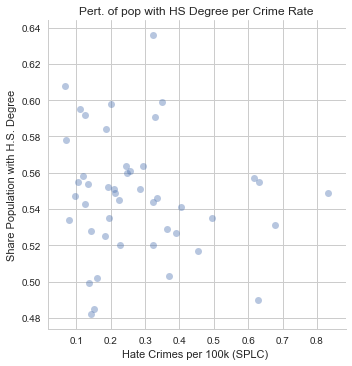

In [225]:

g = sns.lmplot(y='poverty', # Variable 1.
               x='hate_crimes_per_100k_splc',
               data=hate,
               fit_reg=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Share Population with H.S. Degree")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Pert. of pop with HS Degree per Crime Rate')
plt.show()


                                          median_household_income  \
median_household_income                                  1.000000   
share_unemployed_seasonal                               -0.445023   
share_population_in_metro_areas                          0.256924   
share_population_with_high_school_degree                 0.665700   
share_non_citizen                                        0.263097   
share_white_poverty                                     -0.810619   
gini_index                                              -0.347002   
share_non_white                                          0.051640   
share_voters_voted_trump                                -0.592600   
hate_crimes_per_100k_splc                                0.286921   
avg_hatecrimes_per_100k_fbi                              0.242131   
Northeast                                                0.333802   
Southeast                                                     NaN   
Midwest                           

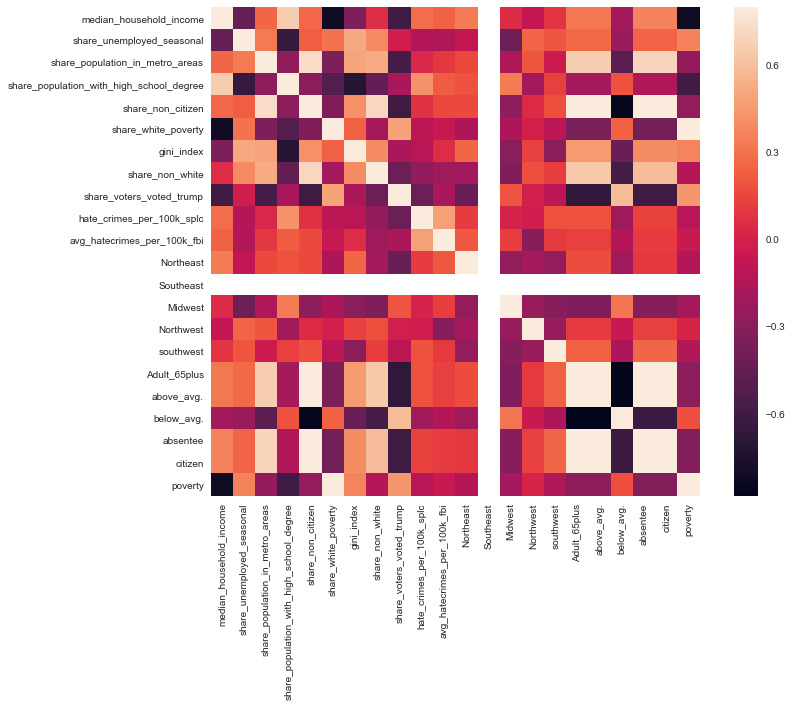

In [221]:

corrmat = hate.corr()
print(corrmat)
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()